## Preprocessing

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.2 MB/s eta 0:00:00


In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score
#  Import and read the charity_data.csv.
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


**WHAT ARE THE TARGET AND FEATURES?**

Target: IS_SUCCESSFUL - Shows us where the money was used effectively (i.e. the "kinds" of applications that should be approved)

Features: APPLICATION_TYPE, AFFILIATION, CLASSIFICATION, USE_CASE, ORGANIZATION, INCOME_AMT, SPECIAL_CONSIDERATIONS, ASK_AMT

In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN','NAME'], axis=1)

In [ ]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [ ]:
# Look at APPLICATION_TYPE value counts for binning
app_type_values = application_df['APPLICATION_TYPE'].value_counts()
app_type_values

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
## Choose a cutoff value and create a list of application types to be replaced
# Create Empty List
application_types_to_replace = []
# Loop through the atv to append any values below 528 to the list
for key, value in app_type_values.items():
  if value <528:
    application_types_to_replace.append(key)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Look at CLASSIFICATION value counts for binning
classification_values = application_df['CLASSIFICATION'].value_counts()
classification_values

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [ ]:
# View only value counts > 1
classification_values[classification_values >1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [ ]:
## Choose a cutoff value and create a list of application types to be replaced
# Create Empty List
classifications_to_replace = []
# Loop through the atv to append any values below 528 to the list
for key, value in classification_values.items():
  if value < 1883:
    classifications_to_replace.append(key)
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
# Find all non-numerical columns and use them to populate a list
categorical_columns = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

# Iterate trhough each column to create dummy variables
for column in categorical_columns:
  # Create the dummies
  dummies = pd.get_dummies(application_df[column], prefix=column, drop_first=True)
  # Concat the dummies into the original Dataframe
  application_df = pd.concat([application_df, dummies], axis=1)

# Drop the original columns
application_df.drop(categorical_columns, axis=1, inplace=True)

# View the Dataframe
application_df


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,108590,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,6692,1,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,1,142590,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34295,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34296,1,5000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34297,1,5000,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Split our preprocessed data into our features and target arrays
target = application_df['IS_SUCCESSFUL']
features = application_df.drop(['IS_SUCCESSFUL'], axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, random_state=1)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [ ]:
# Create the Keras Sequential Model
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=36))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                2960      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5421 (21.18 KB)
Trainable params: 5421 (21.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 5s 5ms/step - loss: 0.5699 - accuracy: 0.7179
Epoch 2/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5555 - accuracy: 0.7294
Epoch 3/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5528 - accuracy: 0.7293
Epoch 4/100
804/804 [==============================] - 5s 6ms/step - loss: 0.5509 - accuracy: 0.7308
Epoch 5/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5495 - accuracy: 0.7312
Epoch 6/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5482 - accuracy: 0.7332
Epoch 7/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5480 - accuracy: 0.7325
Epoch 8/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5473 - accuracy: 0.7327
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5461 - accuracy: 0.7340
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5457 - accura

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5595 - accuracy: 0.7308 - 501ms/epoch - 2ms/step
Loss: 0.5594668984413147, Accuracy: 0.7308454513549805


**Model Optimization**
Attempt 1: Adding another hidden layer

In [ ]:
# Create the Keras Sequential Model
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=36))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Third hidden layer
nn_model.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5723 - accuracy: 0.7197
Epoch 2/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5552 - accuracy: 0.7299
Epoch 3/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5515 - accuracy: 0.7315
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5504 - accuracy: 0.7293
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5494 - accuracy: 0.7304
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5482 - accuracy: 0.7318
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5477 - accuracy: 0.7319
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5475 - accuracy: 0.7322
Epoch 9/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5469 - accuracy: 0.7338
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5455 - accura

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5708 - accuracy: 0.7286 - 471ms/epoch - 2ms/step
Loss: 0.5707889199256897, Accuracy: 0.7286297082901001


**Model Optimization**
Attempt 2: Feature Reduction Using Chi2

In [ ]:
# Re-read into new dataframe and drop ein and name columns as before
application_df2 = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df2 = application_df2.drop(['EIN','NAME'], axis=1)
application_df2 = application_df2.dropna()
application_df2

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [ ]:
# Find any null Values to start feature selection process
application_df2.isnull().sum()

APPLICATION_TYPE          0
AFFILIATION               0
CLASSIFICATION            0
USE_CASE                  0
ORGANIZATION              0
STATUS                    0
INCOME_AMT                0
SPECIAL_CONSIDERATIONS    0
ASK_AMT                   0
IS_SUCCESSFUL             0
dtype: int64

In [ ]:
# separate out categorical variables
categorical_columns = application_df2.dtypes[application_df2.dtypes == "object"].index.tolist()
data = application_df2[categorical_columns].copy()
data.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS
0,T10,Independent,C1000,ProductDev,Association,0,N
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,N
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,N


In [ ]:
#find the unique values
app_types = data['APPLICATION_TYPE'].unique()
app_types


array(['T10', 'T3', 'T5', 'T7', 'T4', 'T6', 'T2', 'T9', 'T19', 'T8',
       'T13', 'T12', 'T29', 'T25', 'T14', 'T17', 'T15'], dtype=object)

In [ ]:
#create the map
app_map = {'T10':0, 'T3':1, 'T5':2, 'T7':3, 'T4':4, 'T6':5, 'T2':6, 'T9':7, 'T19':8, 'T8':9,
       'T13':10, 'T12':11, 'T29':12, 'T25':13, 'T14':14, 'T17':15, 'T15':16}

In [ ]:
#map the column values
data['APPLICATION_TYPE'] = data['APPLICATION_TYPE'].map(app_map)

In [ ]:
data

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS
0,0,Independent,C1000,ProductDev,Association,0,N
1,1,Independent,C2000,Preservation,Co-operative,1-9999,N
2,2,CompanySponsored,C3000,ProductDev,Association,0,N
3,1,CompanySponsored,C2000,Preservation,Trust,10000-24999,N
4,1,Independent,C1000,Heathcare,Trust,100000-499999,N
...,...,...,...,...,...,...,...
34294,4,Independent,C1000,ProductDev,Association,0,N
34295,4,CompanySponsored,C3000,ProductDev,Association,0,N
34296,1,CompanySponsored,C2000,Preservation,Association,0,N
34297,2,Independent,C3000,ProductDev,Association,0,N


In [ ]:
#find the unique values
affiliations = data['AFFILIATION'].unique()
affiliations

array(['Independent', 'CompanySponsored', 'Family/Parent', 'National',
       'Regional', 'Other'], dtype=object)

In [ ]:
#create the map
aff_map = {'Independent': 0, 'CompanySponsored': 1, 'Family/Parent': 2, 'National': 3,
       'Regional': 4, 'Other': 5}

In [ ]:
#map the column values
data['AFFILIATION'] = data['AFFILIATION'].map(aff_map)
data

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS
0,0,0,C1000,ProductDev,Association,0,N
1,1,0,C2000,Preservation,Co-operative,1-9999,N
2,2,1,C3000,ProductDev,Association,0,N
3,1,1,C2000,Preservation,Trust,10000-24999,N
4,1,0,C1000,Heathcare,Trust,100000-499999,N
...,...,...,...,...,...,...,...
34294,4,0,C1000,ProductDev,Association,0,N
34295,4,1,C3000,ProductDev,Association,0,N
34296,1,1,C2000,Preservation,Association,0,N
34297,2,0,C3000,ProductDev,Association,0,N


In [ ]:
#find the unique values
classifications = data['CLASSIFICATION'].unique()
classifications

array(['C1000', 'C2000', 'C3000', 'C1200', 'C2700', 'C7000', 'C7200',
       'C1700', 'C4000', 'C7100', 'C2800', 'C6000', 'C2100', 'C1238',
       'C5000', 'C7120', 'C1800', 'C4100', 'C1400', 'C1270', 'C2300',
       'C8200', 'C1500', 'C7210', 'C1300', 'C1230', 'C1280', 'C1240',
       'C2710', 'C2561', 'C1250', 'C8000', 'C1245', 'C1260', 'C1235',
       'C1720', 'C1257', 'C4500', 'C2400', 'C8210', 'C1600', 'C1278',
       'C1237', 'C4120', 'C2170', 'C1728', 'C1732', 'C2380', 'C1283',
       'C1570', 'C2500', 'C1267', 'C3700', 'C1580', 'C2570', 'C1256',
       'C1236', 'C1234', 'C1246', 'C2190', 'C4200', 'C0', 'C3200',
       'C5200', 'C1370', 'C2600', 'C1248', 'C6100', 'C1820', 'C1900',
       'C2150'], dtype=object)

In [ ]:
#create the map
class_map = {'C1000':0, 'C2000':1, 'C3000':2, 'C1200':3, 'C2700':4, 'C7000':5, 'C7200':6,
       'C1700':7, 'C4000':8, 'C7100':9, 'C2800':10, 'C6000':11, 'C2100':12, 'C1238':13,
       'C5000':14, 'C7120':15, 'C1800':16, 'C4100':17, 'C1400':18, 'C1270':19, 'C2300':20,
       'C8200':21, 'C1500':22, 'C7210':23, 'C1300':24, 'C1230':25, 'C1280':26, 'C1240':27,
       'C2710':28, 'C2561':29, 'C1250':30, 'C8000':31, 'C1245':32, 'C1260':33, 'C1235':34,
       'C1720':35, 'C1257':36, 'C4500':37, 'C2400':38, 'C8210':39, 'C1600':40, 'C1278':41,
       'C1237':42, 'C4120':43, 'C2170':44, 'C1728':45, 'C1732':46, 'C2380':47, 'C1283':48,
       'C1570':49, 'C2500':50, 'C1267':51, 'C3700':52, 'C1580':53, 'C2570':54, 'C1256':55,
       'C1236':56, 'C1234':57, 'C1246':58, 'C2190':59, 'C4200':60, 'C0':61, 'C3200':62,
       'C5200':63, 'C1370':64, 'C2600':65, 'C1248':66, 'C6100':67, 'C1820':68, 'C1900':69,
       'C2150':70}

#map the column values
data['CLASSIFICATION'] = data['CLASSIFICATION'].map(class_map)
data

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS
0,0,0,0,ProductDev,Association,0,N
1,1,0,1,Preservation,Co-operative,1-9999,N
2,2,1,2,ProductDev,Association,0,N
3,1,1,1,Preservation,Trust,10000-24999,N
4,1,0,0,Heathcare,Trust,100000-499999,N
...,...,...,...,...,...,...,...
34294,4,0,0,ProductDev,Association,0,N
34295,4,1,2,ProductDev,Association,0,N
34296,1,1,1,Preservation,Association,0,N
34297,2,0,2,ProductDev,Association,0,N


In [ ]:
#find the unique values
uses = data['USE_CASE'].unique()
uses

array(['ProductDev', 'Preservation', 'Heathcare', 'CommunityServ',
       'Other'], dtype=object)

In [ ]:
#create the map
use_map = {'ProductDev':1, 'Preservation':2, 'Heathcare':3, 'CommunityServ':4,
       'Other':5}

#map the column values
data['USE_CASE'] = data['USE_CASE'].map(use_map)
data

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS
0,0,0,0,1,Association,0,N
1,1,0,1,2,Co-operative,1-9999,N
2,2,1,2,1,Association,0,N
3,1,1,1,2,Trust,10000-24999,N
4,1,0,0,3,Trust,100000-499999,N
...,...,...,...,...,...,...,...
34294,4,0,0,1,Association,0,N
34295,4,1,2,1,Association,0,N
34296,1,1,1,2,Association,0,N
34297,2,0,2,1,Association,0,N


In [ ]:
#find the unique values
organizations = data['ORGANIZATION'].unique()
organizations

array(['Association', 'Co-operative', 'Trust', 'Corporation'],
      dtype=object)

In [ ]:
#create the map
org_map = {'Association':0, 'Co-operative':1, 'Trust':2, 'Corporation':3}

#map the column values
data['ORGANIZATION'] = data['ORGANIZATION'].map(org_map)
data

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS
0,0,0,0,1,0,0,N
1,1,0,1,2,1,1-9999,N
2,2,1,2,1,0,0,N
3,1,1,1,2,2,10000-24999,N
4,1,0,0,3,2,100000-499999,N
...,...,...,...,...,...,...,...
34294,4,0,0,1,0,0,N
34295,4,1,2,1,0,0,N
34296,1,1,1,2,0,0,N
34297,2,0,2,1,0,0,N


In [ ]:
#find the unique values
incomes = data['INCOME_AMT'].unique()
incomes

array(['0', '1-9999', '10000-24999', '100000-499999', '10M-50M',
       '25000-99999', '50M+', '1M-5M', '5M-10M'], dtype=object)

In [ ]:
#create the map
income_map = {'0':0, '1-9999':1, '10000-24999':2, '100000-499999':3, '10M-50M':4,
       '25000-99999':5, '50M+':6, '1M-5M':7, '5M-10M':8}

#map the column values
data['INCOME_AMT'] = data['INCOME_AMT'].map(income_map)
data

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS
0,0,0,0,1,0,0,N
1,1,0,1,2,1,1,N
2,2,1,2,1,0,0,N
3,1,1,1,2,2,2,N
4,1,0,0,3,2,3,N
...,...,...,...,...,...,...,...
34294,4,0,0,1,0,0,N
34295,4,1,2,1,0,0,N
34296,1,1,1,2,0,0,N
34297,2,0,2,1,0,0,N


In [ ]:
#find the unique values
considerations = data['SPECIAL_CONSIDERATIONS'].unique()
considerations

array(['N', 'Y'], dtype=object)

In [ ]:
#create the map
consid_map = {'N':0, 'Y':1}

#map the column values
data['SPECIAL_CONSIDERATIONS'] = data['SPECIAL_CONSIDERATIONS'].map(consid_map)
data

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS
0,0,0,0,1,0,0,0
1,1,0,1,2,1,1,0
2,2,1,2,1,0,0,0
3,1,1,1,2,2,2,0
4,1,0,0,3,2,3,0
...,...,...,...,...,...,...,...
34294,4,0,0,1,0,0,0
34295,4,1,2,1,0,0,0
34296,1,1,1,2,0,0,0
34297,2,0,2,1,0,0,0


In [ ]:
# double check the data types are int
data.dtypes

APPLICATION_TYPE          int64
AFFILIATION               int64
CLASSIFICATION            int64
USE_CASE                  int64
ORGANIZATION              int64
INCOME_AMT                int64
SPECIAL_CONSIDERATIONS    int64
dtype: object

**PERFORM THE F-TEST**

In [ ]:
#separate the target and features
X = data.copy()
y=application_df2['IS_SUCCESSFUL']

In [ ]:
#split the training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [ ]:
#find the accuracy and p-values of the training sets
f_score = chi2(X_train, y_train)

In [ ]:
#display the values
f_score

(array([3.77355841e+02, 2.02881993e+03, 7.05277976e+02, 1.22241444e-01,
        5.17181597e+02, 4.31176929e+01, 1.28717508e+00]),
 array([4.68426363e-084, 0.00000000e+000, 2.12803909e-155, 7.26616064e-001,
        1.73670473e-114, 5.15440239e-011, 2.56569200e-001]))

In [ ]:
# put the p-values into a series and sort them ascending
p_values = pd.Series(f_score[1], index = X_train.columns)
p_values.sort_values(ascending = True, inplace = True)

In [ ]:
#display the p-values for each column
p_values

AFFILIATION                0.000000e+00
CLASSIFICATION            2.128039e-155
ORGANIZATION              1.736705e-114
APPLICATION_TYPE           4.684264e-84
INCOME_AMT                 5.154402e-11
SPECIAL_CONSIDERATIONS     2.565692e-01
USE_CASE                   7.266161e-01
dtype: float64

<Axes: >

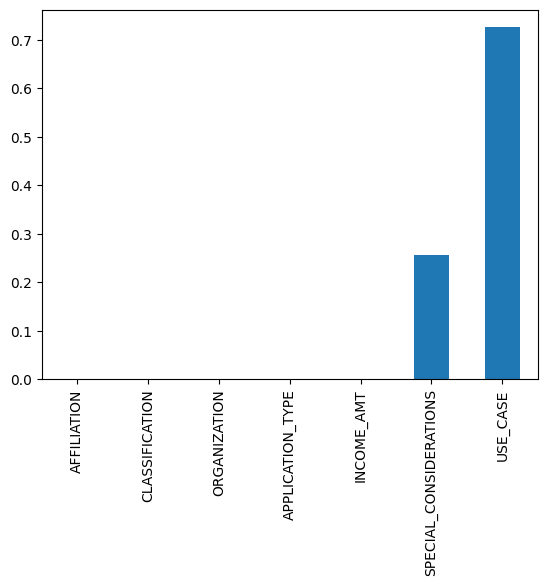

In [ ]:
#plot the p-values for visual selection
p_values.plot.bar()

In [ ]:
#create training sets based on the lowest p-values to compare relative accuracy of 7-2 features
X_train_6 = X_train[['AFFILIATION', 'CLASSIFICATION', 'ORGANIZATION', 'APPLICATION_TYPE', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS']]
X_test_6 = X_test[['AFFILIATION', 'CLASSIFICATION', 'ORGANIZATION', 'APPLICATION_TYPE', 'INCOME_AMT','SPECIAL_CONSIDERATIONS']]

In [ ]:
X_train_5 = X_train[['AFFILIATION', 'CLASSIFICATION', 'ORGANIZATION', 'APPLICATION_TYPE', 'INCOME_AMT']]
X_test_5 = X_test[['AFFILIATION', 'CLASSIFICATION', 'ORGANIZATION', 'APPLICATION_TYPE', 'INCOME_AMT']]

In [ ]:
X_train_4 = X_train[['AFFILIATION', 'CLASSIFICATION', 'ORGANIZATION', 'APPLICATION_TYPE']]
X_test_4 = X_test[['AFFILIATION', 'CLASSIFICATION', 'ORGANIZATION', 'APPLICATION_TYPE']]

In [ ]:
X_train_3 = X_train[['AFFILIATION', 'CLASSIFICATION', 'ORGANIZATION']]
X_test_3 = X_test[['AFFILIATION', 'CLASSIFICATION', 'ORGANIZATION']]

In [ ]:
X_train_2 = X_train[['AFFILIATION', 'CLASSIFICATION']]
X_test_2 = X_test[['AFFILIATION', 'CLASSIFICATION']]

In [ ]:
#function for random forest classification based on feature selection
def run_randomForest(X_train, X_test, y_train, y_test):
  clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print('Accuracy: ', accuracy_score(y_test, y_pred))

In [ ]:
#run the original feature set
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy:  0.7215743440233237
CPU times: user 17.5 s, sys: 387 ms, total: 17.9 s
Wall time: 12.1 s


In [ ]:
#run the 6 feature set
%%time
run_randomForest(X_train_6, X_test_6, y_train, y_test)

Accuracy:  0.7220116618075801
CPU times: user 16.8 s, sys: 395 ms, total: 17.2 s
Wall time: 11.3 s


In [ ]:
#run the 5 feature set
%%time
run_randomForest(X_train_5, X_test_5, y_train, y_test)

Accuracy:  0.721865889212828
CPU times: user 16.3 s, sys: 361 ms, total: 16.6 s
Wall time: 10.6 s


In [ ]:
#run the 4 feature set
%%time
run_randomForest(X_train_4, X_test_4, y_train, y_test)

Accuracy:  0.7166180758017493
CPU times: user 14 s, sys: 314 ms, total: 14.3 s
Wall time: 9.35 s


In [ ]:
#run the 3 feature set
%%time
run_randomForest(X_train_3, X_test_3, y_train, y_test)

Accuracy:  0.6803206997084548
CPU times: user 11.1 s, sys: 325 ms, total: 11.5 s
Wall time: 6.92 s


In [ ]:
#run the 2 feature set
%%time
run_randomForest(X_train_2, X_test_2, y_train, y_test)

Accuracy:  0.6794460641399417
CPU times: user 10.4 s, sys: 275 ms, total: 10.7 s
Wall time: 7.37 s


In [ ]:
application_df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_T10',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7',
       'APPLICATION_TYPE_T8', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000',
       'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000', 'CLASSIFICATION_Other',
       'USE_CASE_Heathcare', 'USE_CASE_Other', 'USE_CASE_Preservation',
       'USE_CASE_ProductDev', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_1-9999',
       'INCOME_AMT_10000-24999', 'INCOME_AMT_100000-499999',
       'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M', 'INCOME_AMT_25000-99999',
       'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M', 'SPECIAL_CONSIDERATIONS_Y'],
      dtype='object')

In [ ]:
target = application_df['IS_SUCCESSFUL']
features = application_df.drop(['IS_SUCCESSFUL','USE_CASE_Heathcare', 'USE_CASE_Other', 'USE_CASE_Preservation',
       'USE_CASE_ProductDev','STATUS','ASK_AMT'], axis=1)


In [ ]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, random_state=1)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
features

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_Family/Parent,AFFILIATION_Independent,...,ORGANIZATION_Trust,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
34295,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34296,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34297,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Create the Keras Sequential Model
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=30))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 80)                2480      
                                                                 
 dense_8 (Dense)             (None, 30)                2430      
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4941 (19.30 KB)
Trainable params: 4941 (19.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5722 - accuracy: 0.7203
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5582 - accuracy: 0.7260
Epoch 3/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5552 - accuracy: 0.7282
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5537 - accuracy: 0.7300
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5530 - accuracy: 0.7304
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5521 - accuracy: 0.7304
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5511 - accuracy: 0.7321
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5511 - accuracy: 0.7308
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5497 - accuracy: 0.7304
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5501 - accura

In [ ]:
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5635 - accuracy: 0.7278 - 451ms/epoch - 2ms/step
Loss: 0.5634552240371704, Accuracy: 0.7278134226799011


**Model Optimization**
Attempt 3: Adjust the train/test ratio

In [ ]:
# Split our preprocessed data into our features and target arrays
target = application_df['IS_SUCCESSFUL']
features = application_df.drop(['IS_SUCCESSFUL'], axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.1, random_state=1)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Create the Keras Sequential Model
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=36))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 80)                2960      
                                                                 
 dense_14 (Dense)            (None, 30)                2430      
                                                                 
 dense_15 (Dense)            (None, 1)                 31        
                                                                 
Total params: 5421 (21.18 KB)
Trainable params: 5421 (21.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
965/965 [==============================] - 3s 2ms/step - loss: 0.5711 - accuracy: 0.7205
Epoch 2/100
965/965 [==============================] - 2s 2ms/step - loss: 0.5557 - accuracy: 0.7297
Epoch 3/100
965/965 [==============================] - 2s 2ms/step - loss: 0.5524 - accuracy: 0.7308
Epoch 4/100
965/965 [==============================] - 2s 2ms/step - loss: 0.5503 - accuracy: 0.7312
Epoch 5/100
965/965 [==============================] - 2s 3ms/step - loss: 0.5495 - accuracy: 0.7316
Epoch 6/100
965/965 [==============================] - 6s 6ms/step - loss: 0.5489 - accuracy: 0.7335
Epoch 7/100
965/965 [==============================] - 5s 5ms/step - loss: 0.5476 - accuracy: 0.7333
Epoch 8/100
965/965 [==============================] - 3s 3ms/step - loss: 0.5479 - accuracy: 0.7323
Epoch 9/100
965/965 [==============================] - 2s 2ms/step - loss: 0.5470 - accuracy: 0.7330
Epoch 10/100
965/965 [==============================] - 2s 2ms/step - loss: 0.5466 - accura

In [ ]:
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

108/108 - 1s - loss: 0.5592 - accuracy: 0.7297 - 1s/epoch - 13ms/step
Loss: 0.5591887831687927, Accuracy: 0.7297375798225403


**Model Optimization**
Attempt 4: Increase the Epochs

In [ ]:
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
965/965 [==============================] - 2s 2ms/step - loss: 0.5366 - accuracy: 0.7390
Epoch 2/200
965/965 [==============================] - 2s 2ms/step - loss: 0.5367 - accuracy: 0.7390
Epoch 3/200
965/965 [==============================] - 2s 2ms/step - loss: 0.5364 - accuracy: 0.7392
Epoch 4/200
965/965 [==============================] - 2s 2ms/step - loss: 0.5368 - accuracy: 0.7388
Epoch 5/200
965/965 [==============================] - 2s 2ms/step - loss: 0.5365 - accuracy: 0.7391
Epoch 6/200
965/965 [==============================] - 3s 3ms/step - loss: 0.5364 - accuracy: 0.7390
Epoch 7/200
965/965 [==============================] - 2s 2ms/step - loss: 0.5364 - accuracy: 0.7392
Epoch 8/200
965/965 [==============================] - 2s 2ms/step - loss: 0.5362 - accuracy: 0.7395
Epoch 9/200
965/965 [==============================] - 2s 2ms/step - loss: 0.5368 - accuracy: 0.7386
Epoch 10/200
965/965 [==============================] - 2s 2ms/step - loss: 0.5363 - accura

In [78]:
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

108/108 - 0s - loss: 0.5735 - accuracy: 0.7286 - 274ms/epoch - 3ms/step
Loss: 0.5735398530960083, Accuracy: 0.7285714149475098


In [79]:
nn_model.save('AphabetSoupCharity_Optimization.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
